In [9]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [10]:
%run -i '../gcmc.py'

In [11]:
co2_lj1 = pd.read_csv("pure_co2_lj1.csv")
co2_lj2 = pd.read_csv("pure_co2_lj2.csv")
co2_lj3 = pd.read_csv("pure_co2_lj3.csv")
co2_lj4 = pd.read_csv("pure_co2_lj4.csv")

In [12]:
co2_data = pd.read_csv('../c02.txt', sep = '\t')
co2_data['rhoco'] = co2_data[['Density (mol/l)']]*(10**3)*(6.02*10**23)/(10**30)
co2_data['P'] = co2_data['Pressure (bar)']
co2_data = co2_data[ co2_data.P <= 200]
co2_data.head()

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,rhoco,P
0,318.15,5.0,0.19293,5.18340,20.284,22.876,109.310,30.140,39.281,274.18,0.92860,15.928,0.018447,vapor,0.000116144,5.0
1,318.15,10.0,0.39422,2.53670,20.154,22.690,103.140,30.573,40.656,270.96,0.92945,15.980,0.018692,vapor,0.00023732,10.0
2,318.15,15.0,0.60480,1.65340,20.018,22.498,99.333,31.028,42.188,267.68,0.92996,16.047,0.018970,vapor,0.00036409,15.0
3,318.15,20.0,0.82579,1.21100,19.876,22.298,96.487,31.507,43.909,264.33,0.93004,16.131,0.019288,vapor,0.000497126,20.0
4,318.15,25.0,1.05850,0.94474,19.727,22.089,94.153,32.013,45.857,260.91,0.92959,16.234,0.019653,vapor,0.000637217,25.0


In [13]:
print( PR_Fugacity( co2_data.P[1]/10**5, co2_data['Temperature (K)'][1], 1 ) )
n = co2_data.shape[0]
fugacity = np.zeros(n)
#for i in n:
#    fugacity[i], _ = PR_Fugacity( co2_data.P[1]/10**5, co2_data['Temperature (K)'][1], 1 )

(9.999995521675489e-05, 0.0)


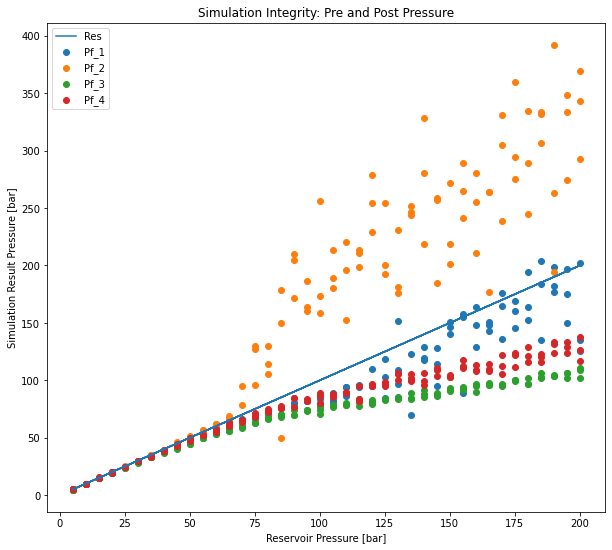

In [16]:
plt.scatter( co2_lj1.P0, co2_lj1.Pf, label = "Pf_1" )
plt.scatter( co2_lj1.P0, co2_lj2.Pf, label = "Pf_2" )
plt.scatter( co2_lj1.P0, co2_lj3.Pf, label = "Pf_3" )
plt.scatter( co2_lj1.P0, co2_lj4.Pf, label = "Pf_4" )
plt.plot( co2_lj1.P0, co2_lj1.P0, label = "Res")
plt.legend()
plt.ylabel("Simulation Result Pressure [bar]")
plt.xlabel("Reservoir Pressure [bar]")
plt.title("Simulation Integrity: Pre and Post Pressure")
plt.savefig("sim_integrity", dpi = 300, bbox_inches = "tight")

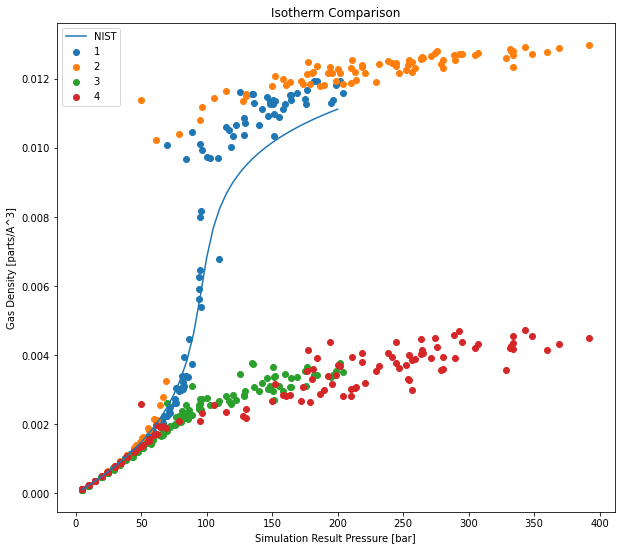

In [17]:
plt.scatter( co2_lj1.Pf, co2_lj1.rhoco, label = "1" )
plt.scatter( co2_lj2.Pf, co2_lj2.rhoco, label = "2" )
plt.scatter( co2_lj1.Pf, co2_lj3.rhoco, label = "3" )
plt.scatter( co2_lj2.Pf, co2_lj4.rhoco, label = "4" )
plt.plot( co2_data.P, co2_data.rhoco, label = "NIST")
plt.legend()
plt.ylabel("Gas Density [parts/A^3]")
plt.xlabel("Simulation Result Pressure [bar]")
plt.title("Isotherm Comparison")
plt.savefig("isotherm_comparison_system", dpi = 300, bbox_inches = "tight")

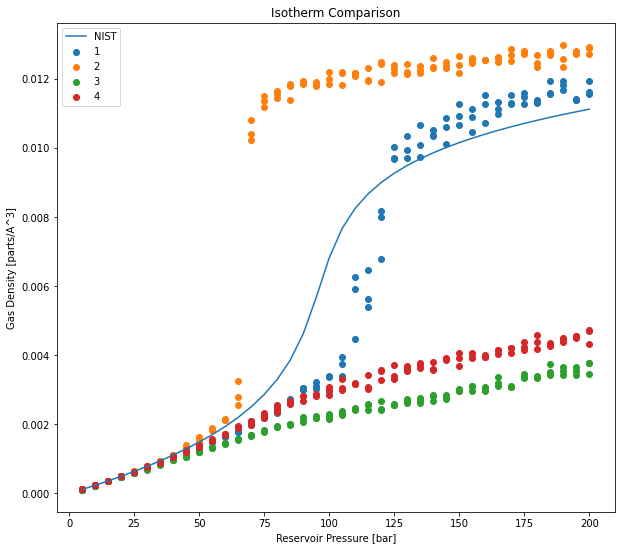

In [18]:
plt.scatter( co2_lj1.P0, co2_lj1.rhoco, label = "1" )
plt.scatter( co2_lj2.P0, co2_lj2.rhoco, label = "2" )
plt.scatter( co2_lj1.P0, co2_lj3.rhoco, label = "3" )
plt.scatter( co2_lj2.P0, co2_lj4.rhoco, label = "4" )
plt.plot( co2_data.P, co2_data.rhoco, label = "NIST")
plt.legend()
plt.ylabel("Gas Density [parts/A^3]")
plt.xlabel("Reservoir Pressure [bar]")
plt.title("Isotherm Comparison")
plt.savefig("isotherm_comparison_res", dpi = 300, bbox_inches = "tight")